# 银行客户认购产品预测 - 数据探索分析

## 项目目标
预测客户是否会认购银行产品（subscribe: yes/no）

## 数据特征说明

| 特征 | 说明 |
|------|------|
| age | 年龄 |
| job | 职业：admin, unknown, unemployed, management... |
| marital | 婚姻状态：married, divorced, single |
| education | 教育程度 |
| default | 信用卡是否有违约: yes or no |
| housing | 是否有房贷: yes or no |
| loan | 是否有个人贷款 |
| contact | 联系方式：unknown, telephone, cellular |
| month | 上一次联系的月份 |
| day_of_week | 上一次联系的星期几 |
| duration | 上一次联系的时长（秒）|
| campaign | 活动期间联系客户的次数 |
| pdays | 上一次与客户联系后的间隔天数 |
| previous | 在本次营销活动前，与客户联系的次数 |
| poutcome | 之前营销活动的结果：unknown, other, failure, success |
| emp_var_rate | 就业变动率（季度指标）|
| cons_price_index | 消费者价格指数（月度指标）|
| cons_conf_index | 消费者信心指数（月度指标）|
| lending_rate3m | 银行同业拆借率3个月利率（每日指标）|
| nr_employed | 雇员人数（季度指标）|
| subscribe | 目标变量：客户是否进行购买 yes 或 no |

In [17]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
from matplotlib import font_manager

warnings.filterwarnings('ignore')

# 先设置seaborn样式，再设置字体（避免被覆盖）
sns.set_style("whitegrid")

# 查找系统中可用的中文字体
def get_chinese_font():
    """获取系统中可用的中文字体"""
    font_list = ['Microsoft YaHei', 'SimHei', 'KaiTi', 'FangSong', 'STSong', 'SimSun']
    available_fonts = [f.name for f in font_manager.fontManager.ttflist]
    
    for font in font_list:
        if font in available_fonts:
            return font
    return 'DejaVu Sans'  # 默认字体

chinese_font = get_chinese_font()
print(f"使用中文字体: {chinese_font}")

# 设置matplotlib参数
plt.rcParams['font.sans-serif'] = [chinese_font] + ['Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置高分辨率
plt.rcParams['figure.dpi'] = 150  # 显示分辨率
plt.rcParams['savefig.dpi'] = 300  # 保存分辨率
plt.rcParams['figure.figsize'] = [10, 6]  # 默认图片大小

# 加载数据
df = pd.read_csv('../data/raw/train.csv')
print(f"数据集形状: {df.shape}")
print(f"样本数量: {df.shape[0]}, 特征数量: {df.shape[1]}")

使用中文字体: Microsoft YaHei
数据集形状: (22500, 22)
样本数量: 22500, 特征数量: 22


## 1. 数据概览

首先查看数据的基本信息，包括数据类型、缺失值情况等。

In [2]:
# 查看数据前几行
print("=" * 60)
print("数据前5行预览:")
print("=" * 60)
df.head()

数据前5行预览:


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no


In [3]:
# 查看数据类型和缺失值
print("=" * 60)
print("数据类型信息:")
print("=" * 60)
print(df.dtypes)
print("\n" + "=" * 60)
print("缺失值统计:")
print("=" * 60)
print(df.isnull().sum())
print(f"\n总缺失值数量: {df.isnull().sum().sum()}")

数据类型信息:
id                    int64
age                   int64
job                  object
marital              object
education            object
default              object
housing              object
loan                 object
contact              object
month                object
day_of_week          object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
emp_var_rate        float64
cons_price_index    float64
cons_conf_index     float64
lending_rate3m      float64
nr_employed         float64
subscribe            object
dtype: object

缺失值统计:
id                  0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
em

In [ ]:
# 数值型特征的统计描述
print("=" * 60)
print("数值型特征统计描述:")
print("=" * 60)
df.describe()

数值型特征统计描述:


,id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,11250.500000,40.407511,1146.303733,3.364800,773.991956,1.316444,0.078529,93.548785,-39.877180,3.302490,5137.211285
std,6495.334864,12.086078,1432.432125,7.223837,326.934334,1.918733,1.573831,2.805786,5.805442,1.611777,170.670611
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,87.640000,-53.280000,0.600000,4715.420000
25%,5625.750000,32.000000,143.000000,1.000000,557.750000,0.000000,-1.800000,91.190000,-44.160000,1.430000,5008.510000
50%,11250.500000,38.000000,353.000000,1.000000,964.000000,0.000000,1.100000,93.540000,-40.600000,3.920000,5133.955000
75%,16875.250000,47.000000,1873.000000,3.000000,1005.000000,2.000000,1.400000,95.920000,-35.797500,4.830000,5267.677500
max,22500.000000,101.000000,5149.000000,57.000000,1048.000000,6.000000,1.400000,99.460000,-25.550000,5.270000,5489.500000


## 2. 目标变量分析 (subscribe)

分析目标变量的分布情况，了解正负样本的比例。

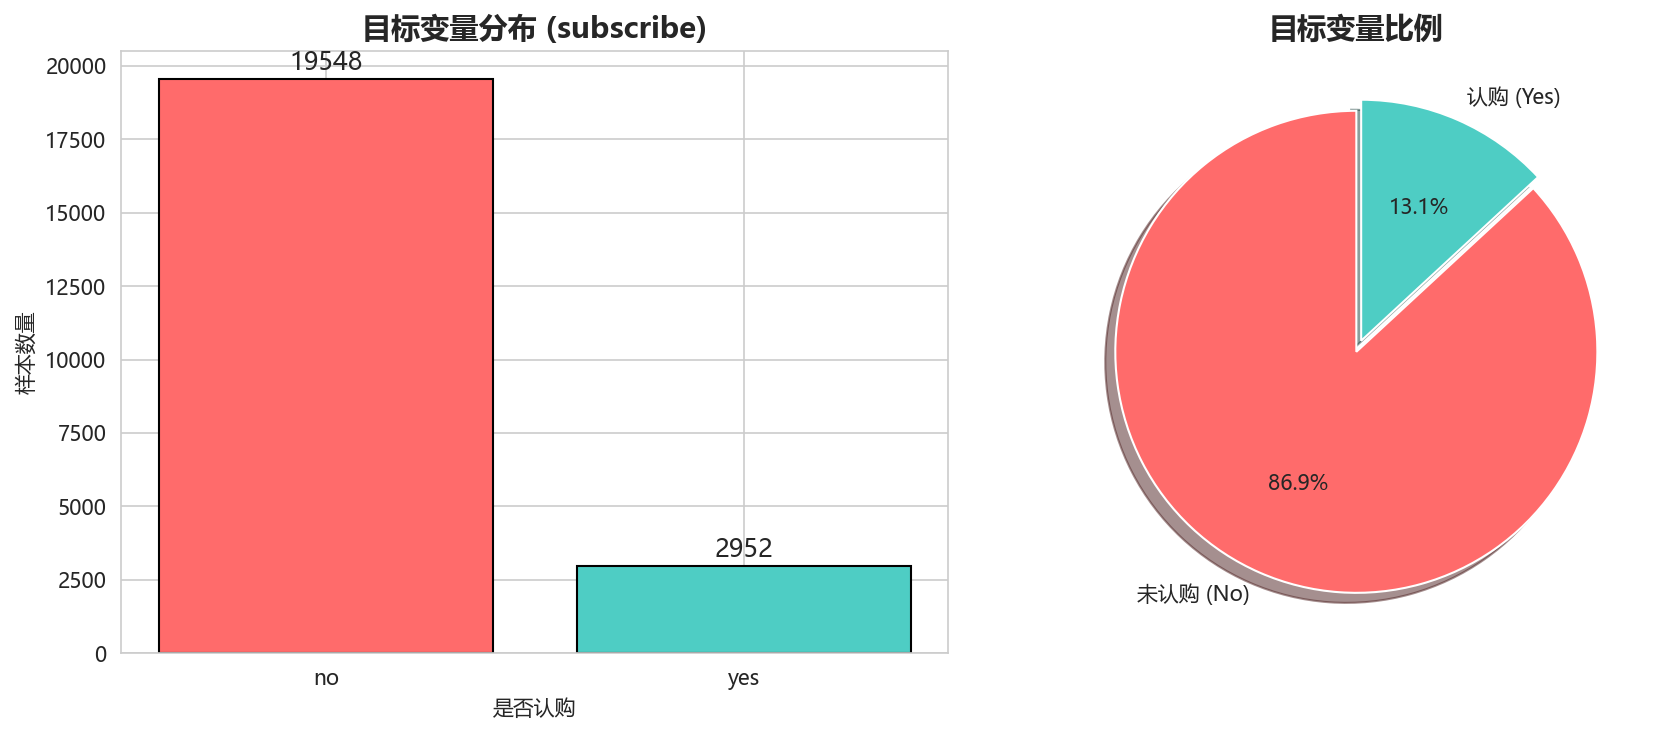


目标变量统计:
- 未认购 (No): 19548 (86.88%)
- 认购 (Yes): 2952 (13.12%)
- 正负样本比例: 1:6.62


In [18]:
# 目标变量分布
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 计数柱状图
subscribe_counts = df['subscribe'].value_counts()
colors = ['#ff6b6b', '#4ecdc4']
ax1 = axes[0]
bars = ax1.bar(subscribe_counts.index, subscribe_counts.values, color=colors, edgecolor='black')
ax1.set_title('目标变量分布 (subscribe)', fontsize=14, fontweight='bold')
ax1.set_xlabel('是否认购')
ax1.set_ylabel('样本数量')
for bar, count in zip(bars, subscribe_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{count}', ha='center', va='bottom', fontsize=12)

# 饼图
ax2 = axes[1]
ax2.pie(subscribe_counts.values, labels=['未认购 (No)', '认购 (Yes)'], 
        autopct='%1.1f%%', colors=colors, explode=(0, 0.05),
        shadow=True, startangle=90)
ax2.set_title('目标变量比例', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# 打印详细统计
print("\n目标变量统计:")
print(f"- 未认购 (No): {subscribe_counts['no']} ({subscribe_counts['no']/len(df)*100:.2f}%)")
print(f"- 认购 (Yes): {subscribe_counts['yes']} ({subscribe_counts['yes']/len(df)*100:.2f}%)")
print(f"- 正负样本比例: 1:{subscribe_counts['no']/subscribe_counts['yes']:.2f}")

**分析结论：**
- 数据集存在明显的**类别不平衡问题**，正负样本比例约为 1:6.62
- 未认购客户占 86.88%，认购客户仅占 13.12%
- 在建模时需要考虑使用过采样（SMOTE）、欠采样或调整类别权重等方法处理不平衡问题

## 3. 数值型特征分析

分析各数值型特征的分布情况，包括年龄、通话时长、活动次数等。

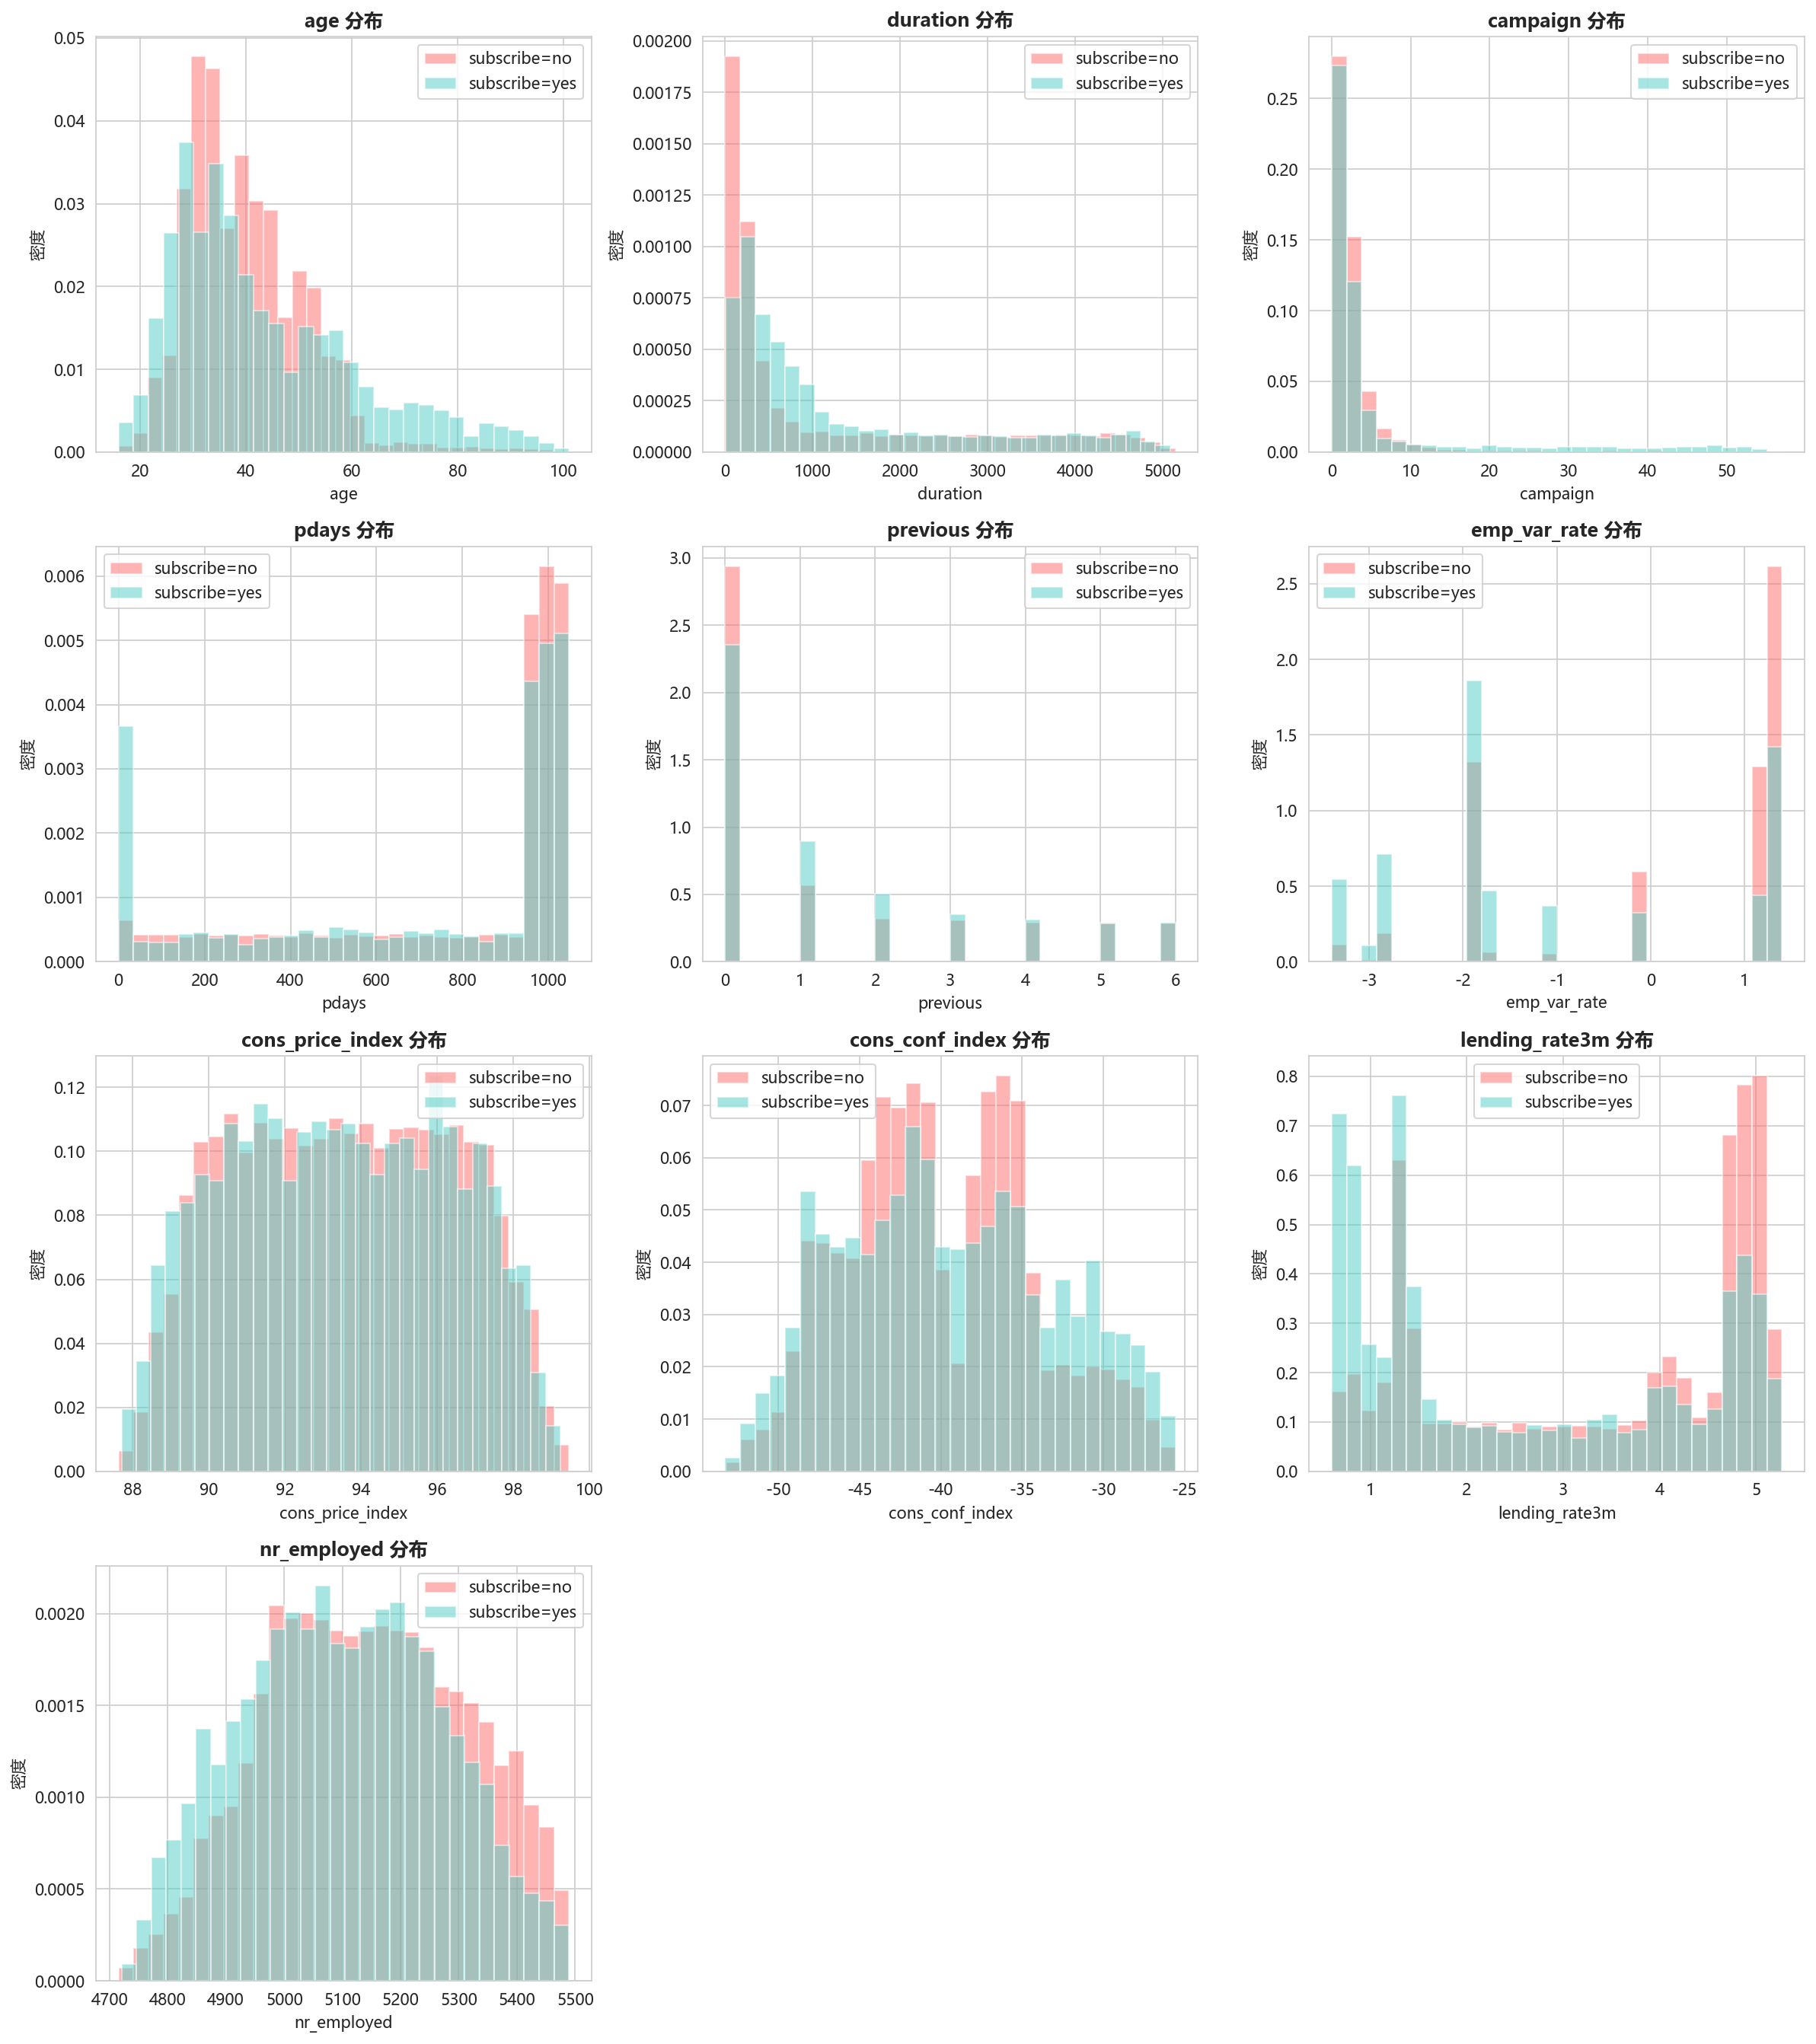

In [19]:
# 定义数值型特征
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'emp_var_rate', 'cons_price_index', 'cons_conf_index', 
                      'lending_rate3m', 'nr_employed']

# 数值型特征分布可视化
fig, axes = plt.subplots(4, 3, figsize=(16, 18))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    ax = axes[idx]
    
    # 绘制直方图和KDE曲线，按目标变量分组
    for label, color in zip(['no', 'yes'], ['#ff6b6b', '#4ecdc4']):
        subset = df[df['subscribe'] == label][col]
        ax.hist(subset, bins=30, alpha=0.5, label=f'subscribe={label}', 
                color=color, density=True, edgecolor='white')
    
    ax.set_title(f'{col} 分布', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('密度')
    ax.legend()

# 删除多余的子图
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('plots/numerical_features_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

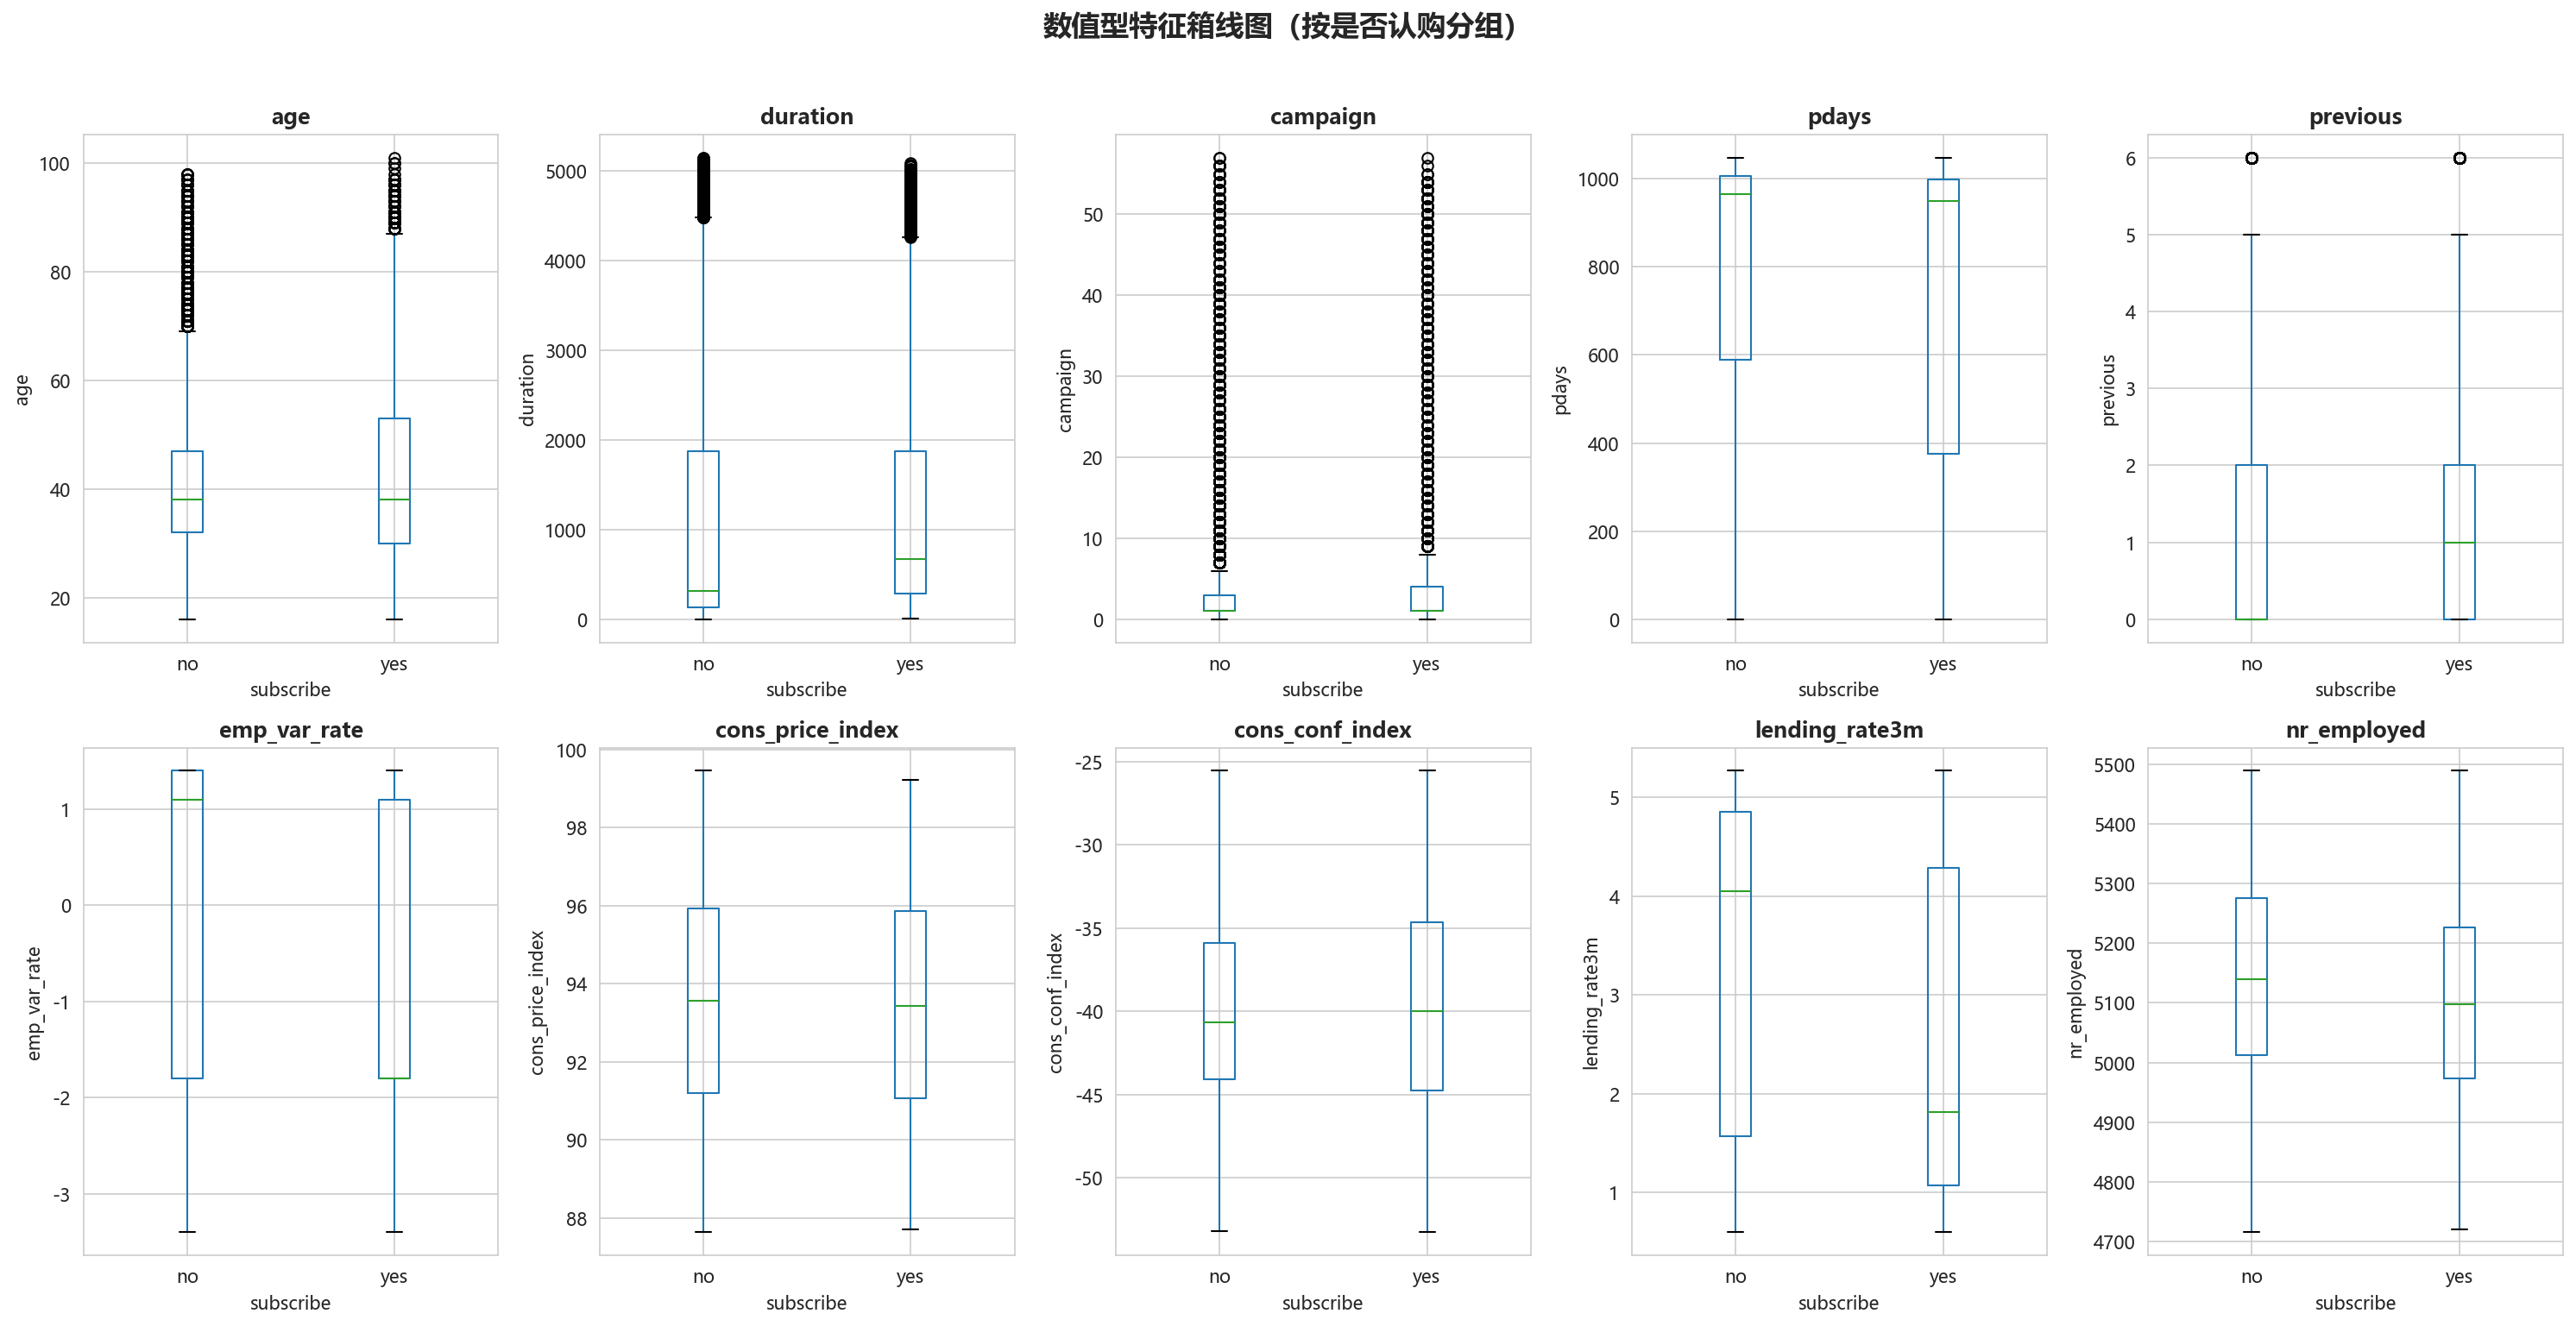

In [20]:
# 数值型特征箱线图 - 按目标变量分组
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    ax = axes[idx]
    df.boxplot(column=col, by='subscribe', ax=ax)
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('subscribe')
    ax.set_ylabel(col)

plt.suptitle('数值型特征箱线图（按是否认购分组）', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('plots/numerical_features_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

**数值型特征分析结论：**

1. **age（年龄）**: 客户年龄主要集中在25-55岁之间，呈现右偏分布。认购和未认购客户的年龄分布相似。

2. **duration（通话时长）**: 这是一个非常重要的特征！认购客户的通话时长明显更长。但注意：该特征只有在通话结束后才知道，实际应用中可能需要谨慎使用。

3. **campaign（活动联系次数）**: 大部分客户在活动期间被联系1-3次，存在大量异常值（多次联系）。

4. **pdays（距上次联系天数）**: 分布极不均匀，大量值集中在高端（可能表示未曾联系过）。

5. **previous（之前联系次数）**: 大部分客户之前未被联系过（值为0），有过成功联系历史的客户认购率更高。

6. **经济指标（emp_var_rate, cons_price_index, cons_conf_index, lending_rate3m, nr_employed）**: 
   - 认购客户往往在经济环境较好时（就业变动率较低、消费者信心较高）更容易认购
   - 雇员人数较低时，认购率相对较高

## 4. 类别型特征分析

分析各类别型特征的分布以及与目标变量的关系。

In [8]:
# 定义类别型特征
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# 查看每个类别型特征的唯一值
print("=" * 60)
print("类别型特征的唯一值统计:")
print("=" * 60)
for col in categorical_features:
    unique_vals = df[col].unique()
    print(f"\n{col} ({len(unique_vals)} 个类别): {unique_vals}")

类别型特征的唯一值统计:

job (12 个类别): ['admin.' 'services' 'blue-collar' 'entrepreneur' 'management'
 'technician' 'housemaid' 'self-employed' 'unemployed' 'retired' 'student'
 'unknown']

marital (4 个类别): ['divorced' 'married' 'single' 'unknown']

education (8 个类别): ['professional.course' 'high.school' 'basic.9y' 'university.degree'
 'unknown' 'basic.4y' 'basic.6y' 'illiterate']

default (3 个类别): ['no' 'unknown' 'yes']

housing (3 个类别): ['yes' 'no' 'unknown']

loan (3 个类别): ['yes' 'no' 'unknown']

contact (2 个类别): ['cellular' 'telephone']

month (10 个类别): ['aug' 'may' 'apr' 'nov' 'jul' 'jun' 'oct' 'dec' 'sep' 'mar']

day_of_week (5 个类别): ['mon' 'wed' 'fri' 'tue' 'thu']

poutcome (3 个类别): ['failure' 'nonexistent' 'success']


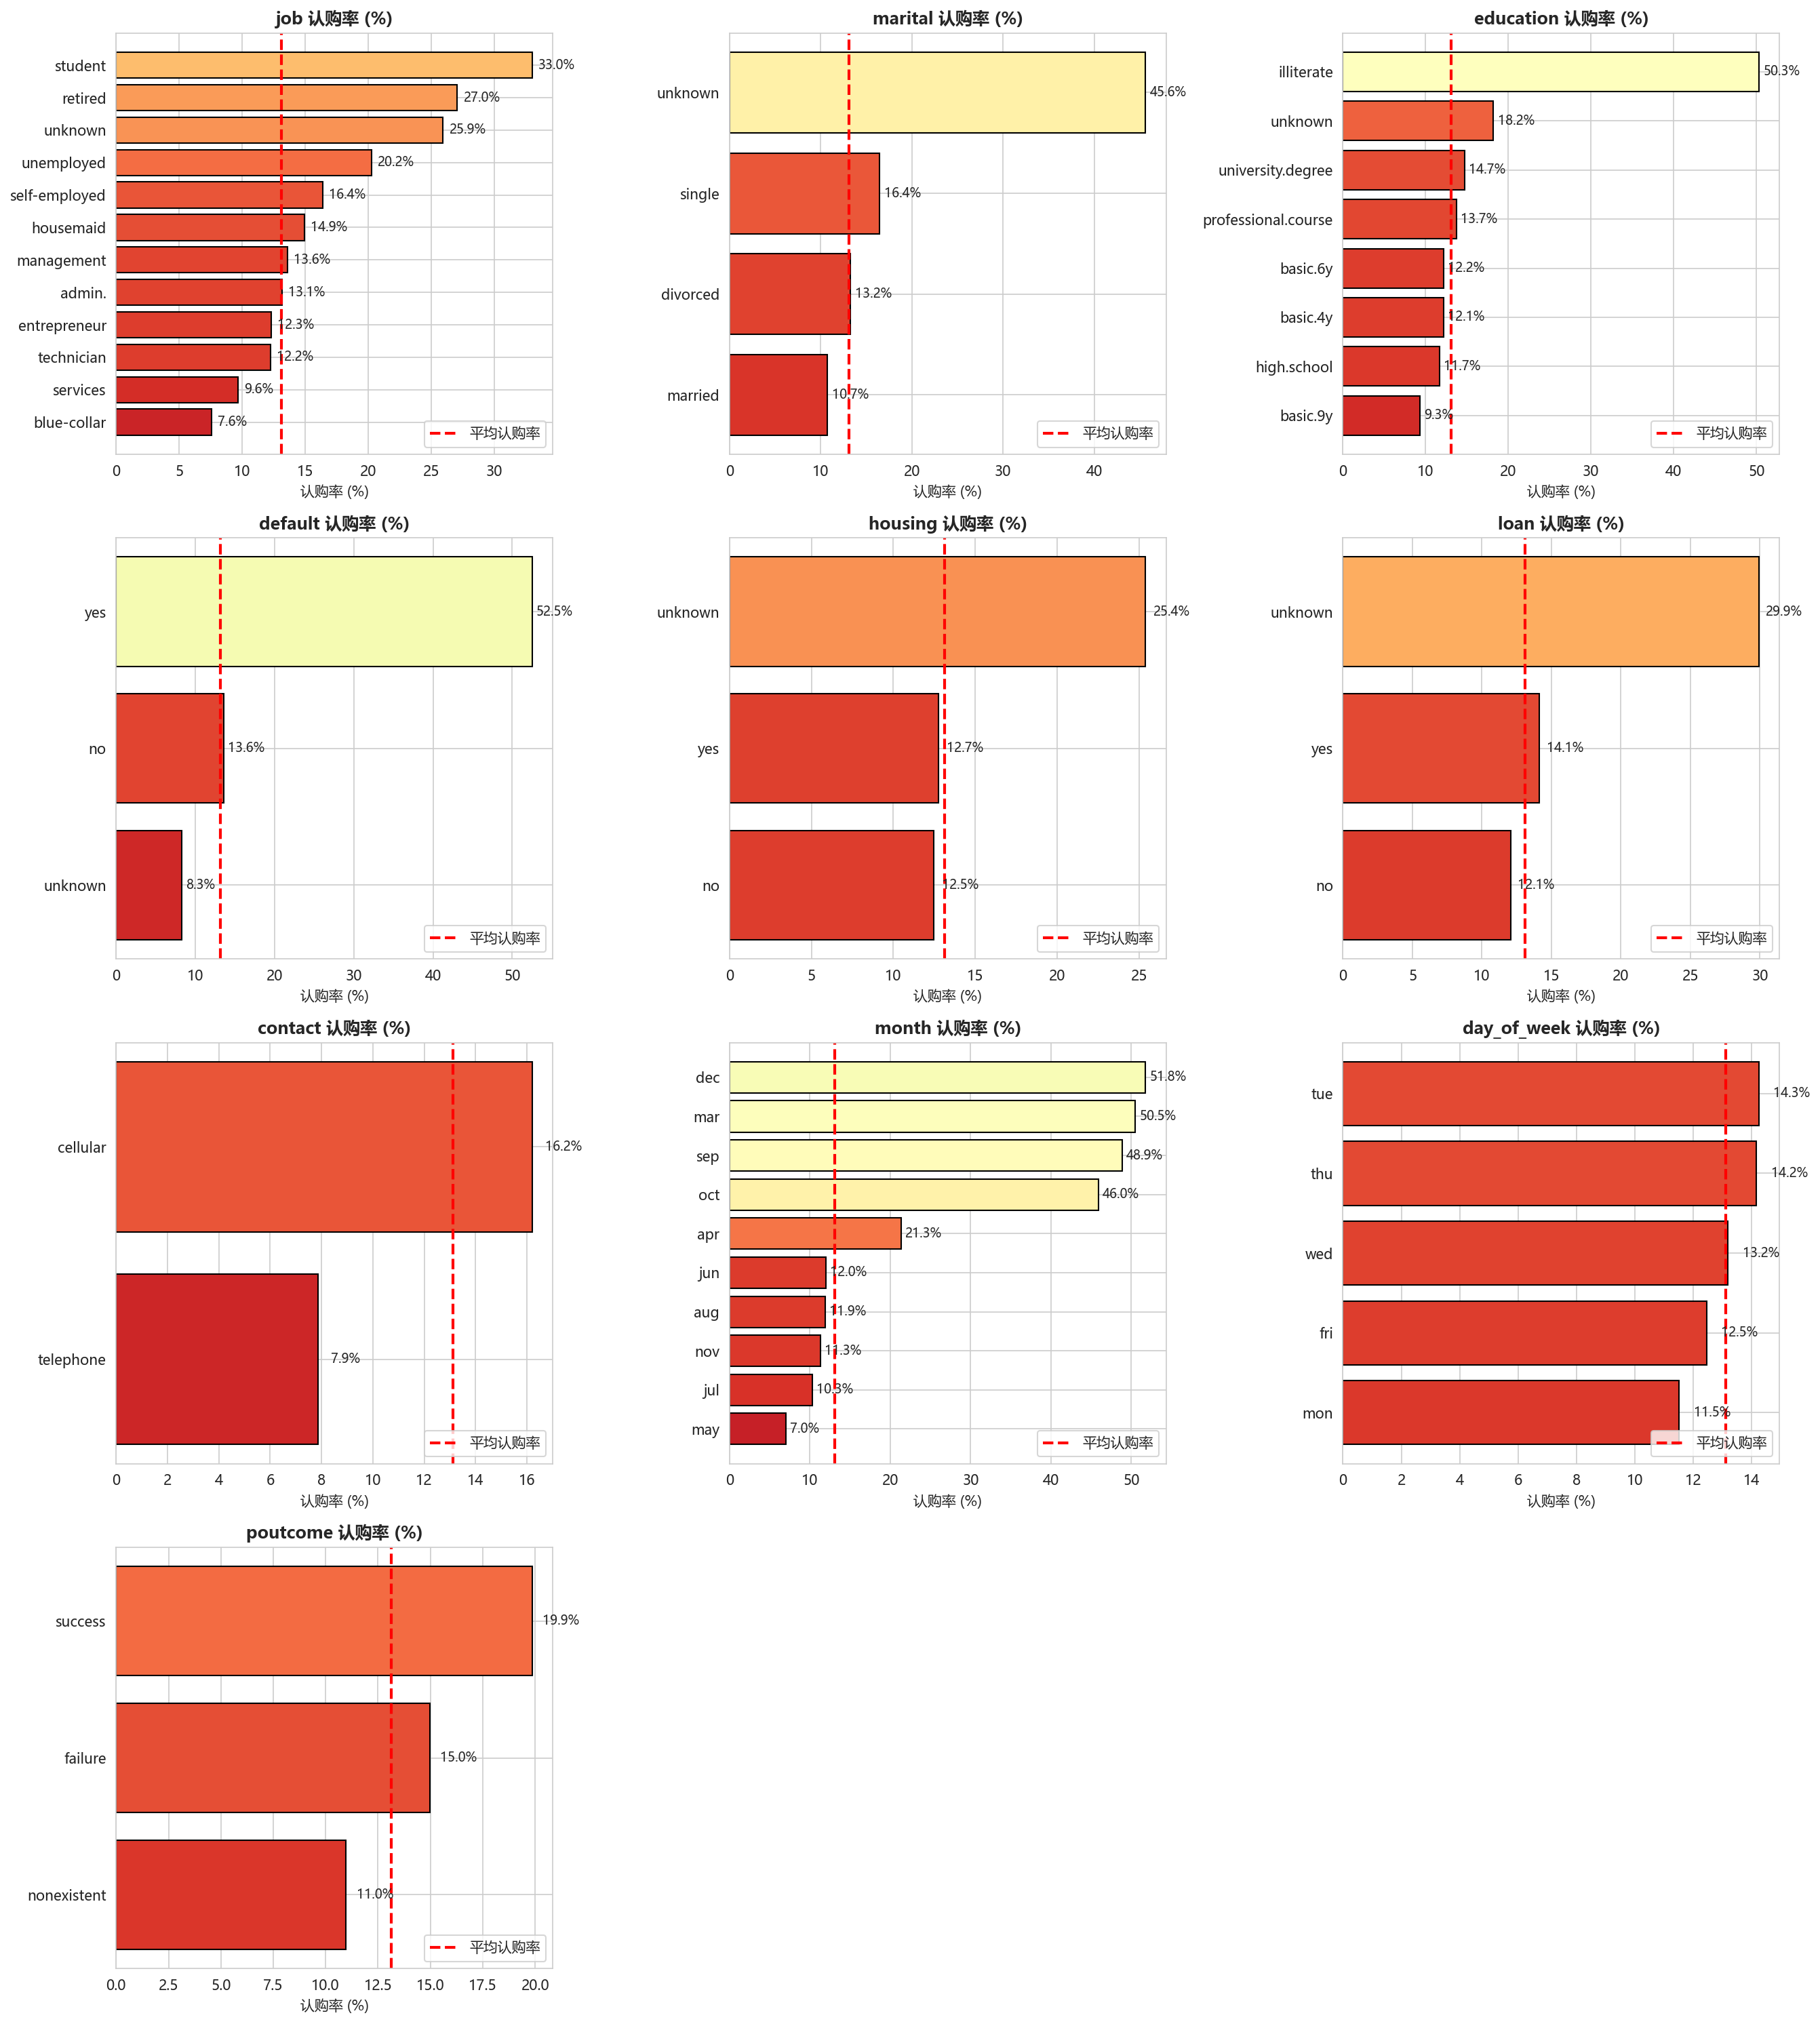

In [21]:
# 类别型特征分布可视化 - 按目标变量分组的认购率
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    ax = axes[idx]
    
    # 计算每个类别的认购率
    subscribe_rate = df.groupby(col)['subscribe'].apply(lambda x: (x == 'yes').mean() * 100)
    counts = df[col].value_counts()
    
    # 按认购率排序
    subscribe_rate = subscribe_rate.sort_values(ascending=True)
    
    # 绘制水平条形图
    colors = plt.cm.RdYlGn(subscribe_rate.values / 100)
    bars = ax.barh(subscribe_rate.index, subscribe_rate.values, color=colors, edgecolor='black')
    
    ax.set_title(f'{col} 认购率 (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('认购率 (%)')
    ax.axvline(x=df['subscribe'].apply(lambda x: 1 if x == 'yes' else 0).mean() * 100, 
               color='red', linestyle='--', linewidth=2, label='平均认购率')
    ax.legend(loc='lower right')
    
    # 添加数值标签
    for bar, rate in zip(bars, subscribe_rate.values):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{rate:.1f}%', ha='left', va='center', fontsize=9)

# 删除多余的子图
for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('plots/categorical_features_subscribe_rate.png', dpi=150, bbox_inches='tight')
plt.show()

**类别型特征分析结论：**

1. **job（职业）**:
   - 学生(student)和退休人员(retired)的认购率最高（约27-33%）
   - 蓝领工人(blue-collar)和服务业(services)的认购率最低（约7.6-9.6%）
   
2. **marital（婚姻状态）**:
   - 单身(single)客户认购率较高（16.4%），已婚(married)客户认购率最低（10.1%）
   
3. **education（教育程度）**:
   - 文盲(illiterate)认购率最高（50.3%），但样本量可能较少
   - 基础教育(basic.9y)认购率最低（9.3%）
   
4. **default（信用违约）**:
   - 有违约记录(yes)的客户认购率反而较高（52.5%），但样本量可能较少
   - 这个现象需要进一步分析
   
5. **contact（联系方式）**:
   - 手机(cellular)联系的认购率（16.2%）高于电话(telephone)（7.9%）
   
6. **month（联系月份）**:
   - 12月(dec)、3月(mar)、9月(sep)、10月(oct)的认购率较高（40-52%）
   - 5月(may)认购率最低（7.0%）
   
7. **poutcome（之前营销结果）**:
   - 之前成功(success)的客户，再次认购率最高（19.9%）
   - 没有联系记录(nonexistent)的客户认购率最低（11.0%）

## 5. 特征相关性分析

分析数值型特征之间的相关性，以及与目标变量的关系。

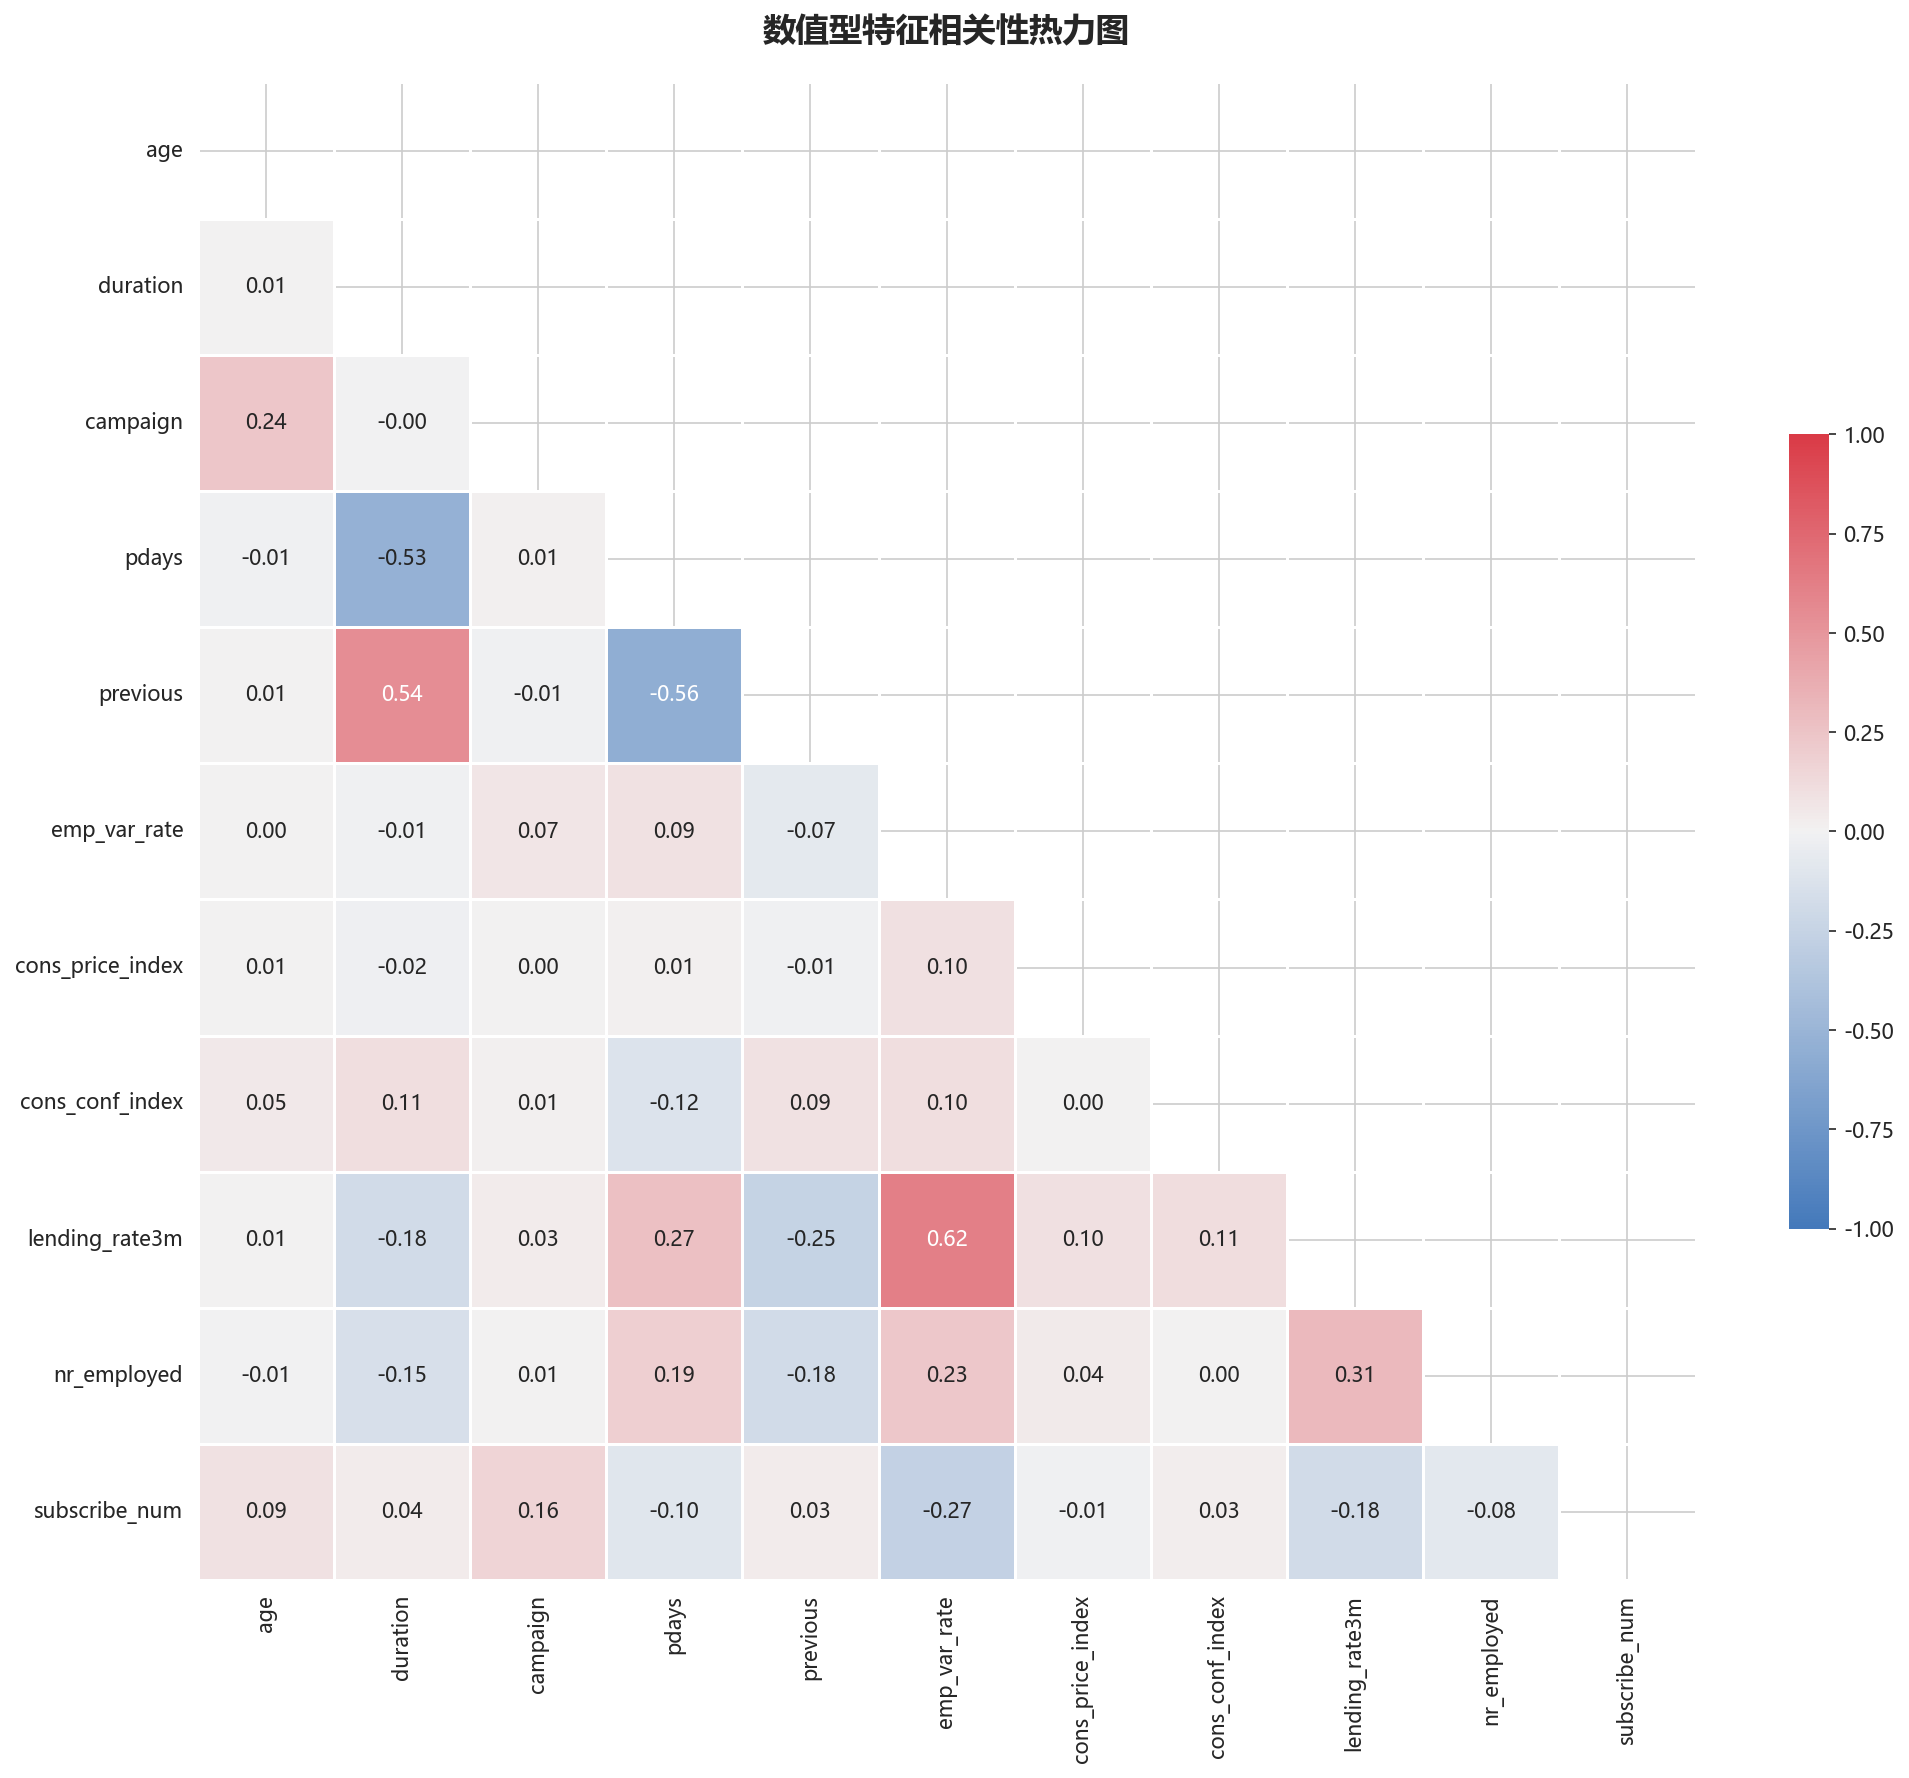


与目标变量(subscribe)的相关性排序:
emp_var_rate        : -0.2704
lending_rate3m      : -0.1810
campaign            : +0.1640
pdays               : -0.0991
age                 : +0.0935
nr_employed         : -0.0819
duration            : +0.0371
previous            : +0.0329
cons_conf_index     : +0.0272
cons_price_index    : -0.0149


In [22]:
# 创建用于相关性分析的数据副本
df_corr = df.copy()

# 将目标变量转换为数值
df_corr['subscribe_num'] = (df_corr['subscribe'] == 'yes').astype(int)

# 计算数值型特征的相关性矩阵
corr_features = numerical_features + ['subscribe_num']
corr_matrix = df_corr[corr_features].corr()

# 绘制热力图
fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, annot=True, fmt='.2f',
            cbar_kws={"shrink": 0.5})

plt.title('数值型特征相关性热力图', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('plots/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# 显示与目标变量的相关性排序
print("\n与目标变量(subscribe)的相关性排序:")
print("=" * 50)
target_corr = corr_matrix['subscribe_num'].drop('subscribe_num').sort_values(key=abs, ascending=False)
for feat, corr in target_corr.items():
    print(f"{feat:20s}: {corr:+.4f}")

**相关性分析结论：**

1. **与目标变量相关性最强的特征**：
   - `emp_var_rate`（就业变动率）: -0.27，负相关，经济不景气时反而认购率较高
   - `lending_rate3m`（同业拆借利率）: -0.18，负相关
   - `campaign`（活动联系次数）: +0.16，正相关

2. **特征之间的高相关性**（需注意多重共线性）：
   - `emp_var_rate` 与 `lending_rate3m`: 0.62（强正相关）
   - `duration` 与 `previous`: 0.54（正相关）
   - `pdays` 与 `previous`: -0.56（负相关）
   - `pdays` 与 `duration`: -0.53（负相关）

3. **经济指标高度相关**：多个经济指标之间存在较强的相关性，在建模时可能需要考虑特征选择或降维

## 6. 单个特征深入分析

对关键特征进行更深入的分析，包括异常值检测和分布特征。

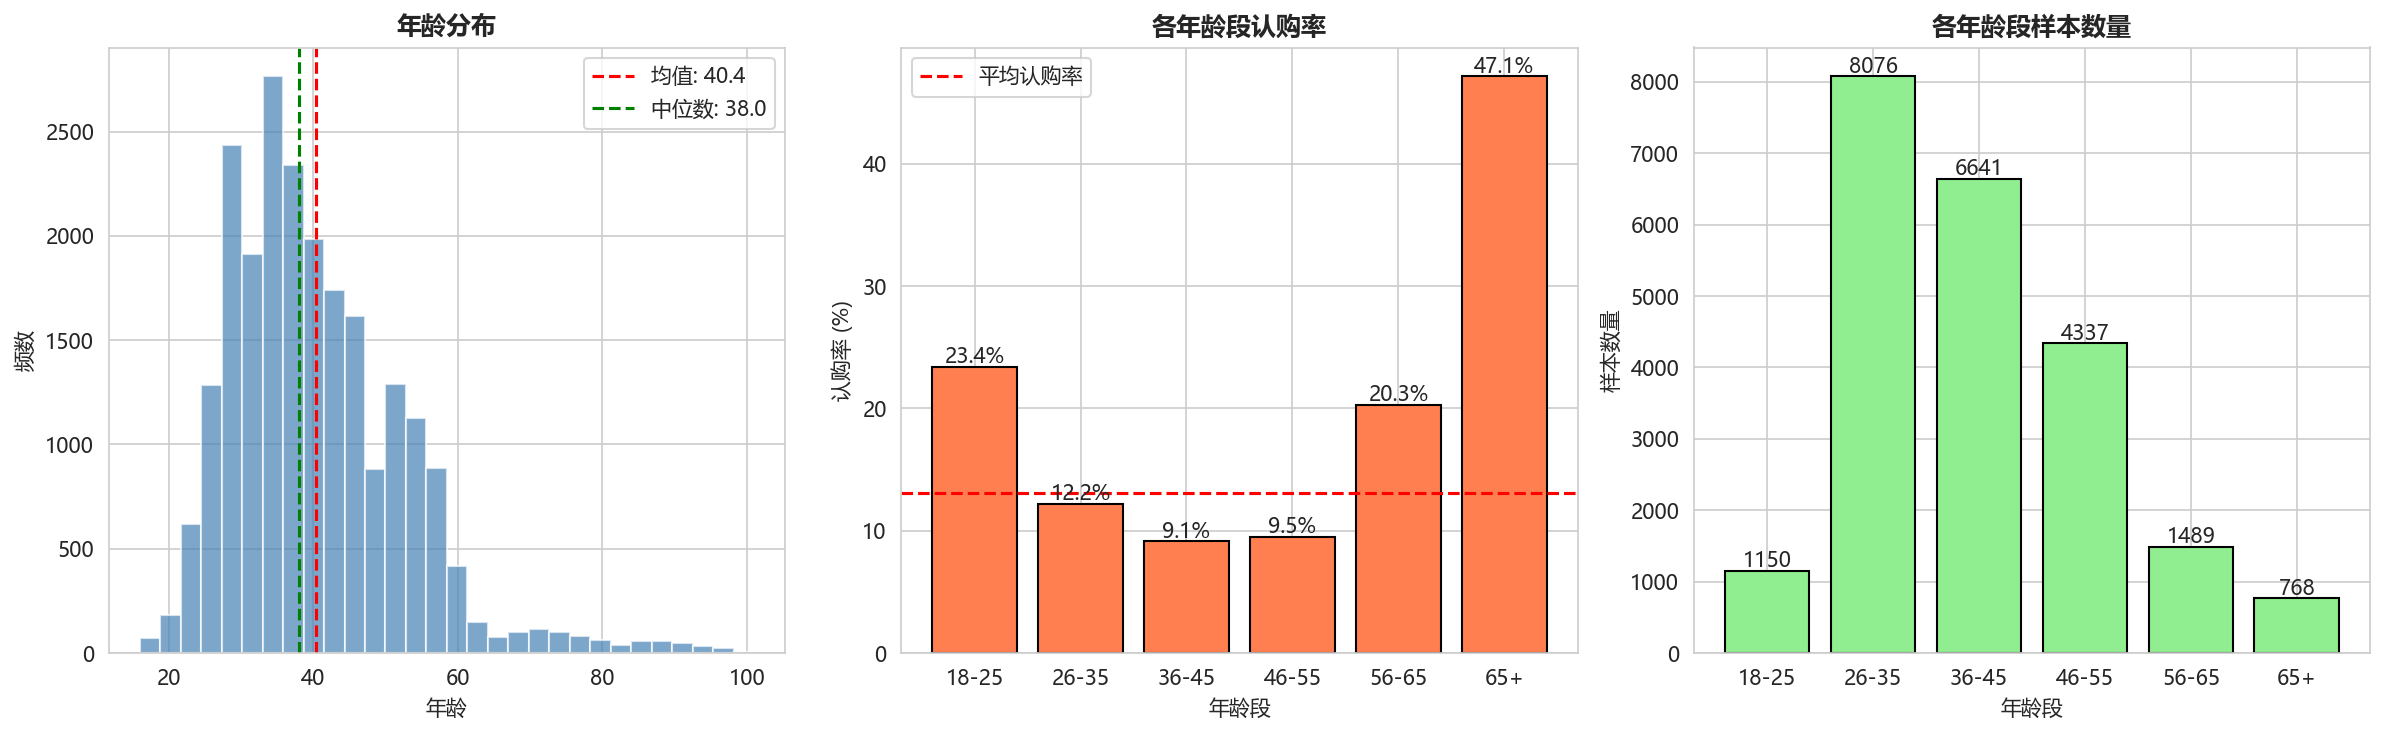


年龄统计: 最小=16, 最大=101, 均值=40.41, 中位数=38.0


In [23]:
# 6.1 年龄(age)分析
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 年龄分布
ax1 = axes[0]
ax1.hist(df['age'], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
ax1.axvline(df['age'].mean(), color='red', linestyle='--', label=f'均值: {df["age"].mean():.1f}')
ax1.axvline(df['age'].median(), color='green', linestyle='--', label=f'中位数: {df["age"].median():.1f}')
ax1.set_title('年龄分布', fontsize=12, fontweight='bold')
ax1.set_xlabel('年龄')
ax1.set_ylabel('频数')
ax1.legend()

# 年龄段认购率
ax2 = axes[1]
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_subscribe = df.groupby('age_group')['subscribe'].apply(lambda x: (x == 'yes').mean() * 100)
bars = ax2.bar(age_subscribe.index, age_subscribe.values, color='coral', edgecolor='black')
ax2.set_title('各年龄段认购率', fontsize=12, fontweight='bold')
ax2.set_xlabel('年龄段')
ax2.set_ylabel('认购率 (%)')
ax2.axhline(y=13.12, color='red', linestyle='--', label='平均认购率')
for bar, rate in zip(bars, age_subscribe.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{rate:.1f}%', ha='center', fontsize=10)
ax2.legend()

# 年龄段样本分布
ax3 = axes[2]
age_counts = df['age_group'].value_counts().sort_index()
ax3.bar(age_counts.index, age_counts.values, color='lightgreen', edgecolor='black')
ax3.set_title('各年龄段样本数量', fontsize=12, fontweight='bold')
ax3.set_xlabel('年龄段')
ax3.set_ylabel('样本数量')
for bar, count in zip(ax3.patches, age_counts.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{count}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('plots/age_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n年龄统计: 最小={df['age'].min()}, 最大={df['age'].max()}, 均值={df['age'].mean():.2f}, 中位数={df['age'].median()}")

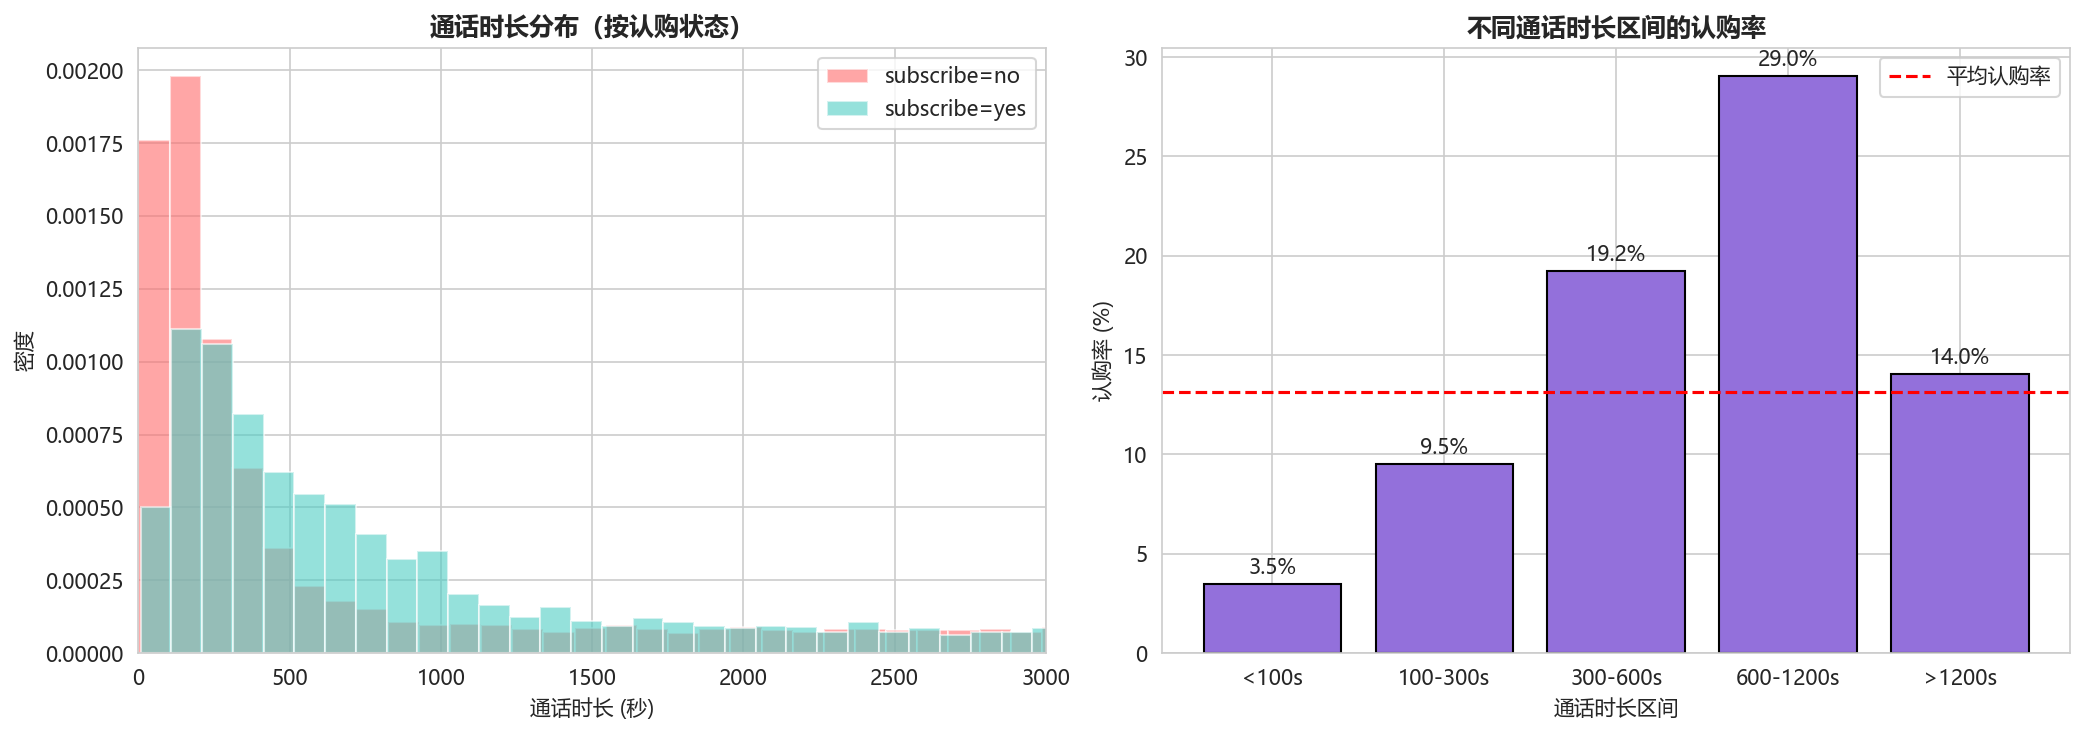


通话时长统计:
认购客户平均通话时长: 1283.0秒
未认购客户平均通话时长: 1125.7秒


In [24]:
# 6.2 通话时长(duration)分析 - 这是一个重要特征
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 通话时长分布（按认购状态）
ax1 = axes[0]
for label, color in zip(['no', 'yes'], ['#ff6b6b', '#4ecdc4']):
    subset = df[df['subscribe'] == label]['duration']
    ax1.hist(subset, bins=50, alpha=0.6, label=f'subscribe={label}', 
             color=color, density=True, edgecolor='white')
ax1.set_title('通话时长分布（按认购状态）', fontsize=12, fontweight='bold')
ax1.set_xlabel('通话时长 (秒)')
ax1.set_ylabel('密度')
ax1.legend()
ax1.set_xlim(0, 3000)  # 限制x轴范围以便更好地观察主要分布

# 通话时长区间认购率
ax2 = axes[1]
df['duration_group'] = pd.cut(df['duration'], bins=[0, 100, 300, 600, 1200, 6000], 
                               labels=['<100s', '100-300s', '300-600s', '600-1200s', '>1200s'])
duration_subscribe = df.groupby('duration_group')['subscribe'].apply(lambda x: (x == 'yes').mean() * 100)
bars = ax2.bar(duration_subscribe.index, duration_subscribe.values, color='mediumpurple', edgecolor='black')
ax2.set_title('不同通话时长区间的认购率', fontsize=12, fontweight='bold')
ax2.set_xlabel('通话时长区间')
ax2.set_ylabel('认购率 (%)')
ax2.axhline(y=13.12, color='red', linestyle='--', label='平均认购率')
for bar, rate in zip(bars, duration_subscribe.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{rate:.1f}%', ha='center', fontsize=10)
ax2.legend()

plt.tight_layout()
plt.savefig('plots/duration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# 统计信息
print(f"\n通话时长统计:")
print(f"认购客户平均通话时长: {df[df['subscribe']=='yes']['duration'].mean():.1f}秒")
print(f"未认购客户平均通话时长: {df[df['subscribe']=='no']['duration'].mean():.1f}秒")

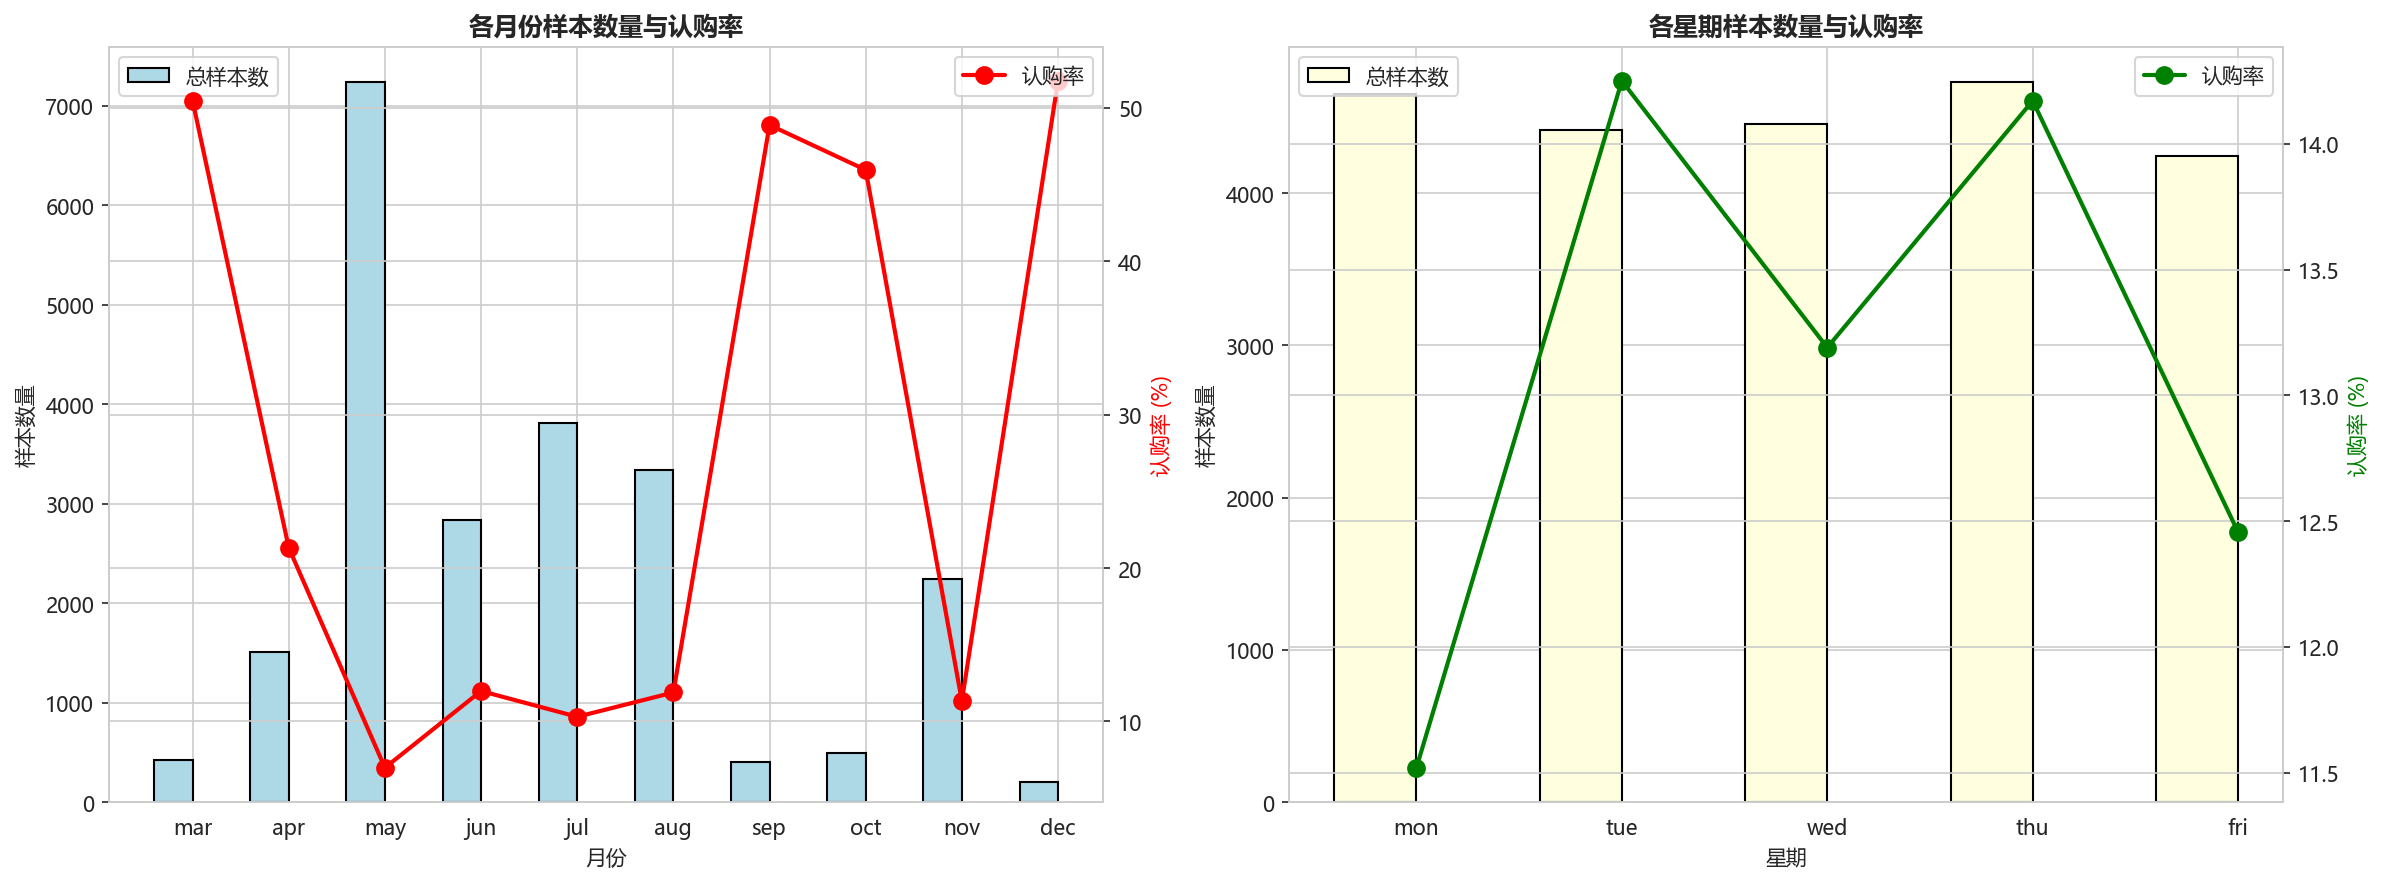

In [25]:
# 6.3 月份(month)和星期(day_of_week)的时间分析
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 月份分析
ax1 = axes[0]
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_data = df.groupby('month').agg({
    'subscribe': [lambda x: (x == 'yes').sum(), 'count']
}).reset_index()
month_data.columns = ['month', 'yes_count', 'total']
month_data['subscribe_rate'] = month_data['yes_count'] / month_data['total'] * 100
month_data['month'] = pd.Categorical(month_data['month'], categories=month_order, ordered=True)
month_data = month_data.sort_values('month')

x = np.arange(len(month_data))
width = 0.4
bars1 = ax1.bar(x - width/2, month_data['total'], width, label='总样本数', color='lightblue', edgecolor='black')
ax1_twin = ax1.twinx()
bars2 = ax1_twin.plot(x, month_data['subscribe_rate'], 'ro-', label='认购率', linewidth=2, markersize=8)
ax1.set_xlabel('月份')
ax1.set_ylabel('样本数量')
ax1_twin.set_ylabel('认购率 (%)', color='red')
ax1.set_xticks(x)
ax1.set_xticklabels(month_data['month'])
ax1.set_title('各月份样本数量与认购率', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# 星期分析
ax2 = axes[1]
dow_order = ['mon', 'tue', 'wed', 'thu', 'fri']
dow_data = df.groupby('day_of_week').agg({
    'subscribe': [lambda x: (x == 'yes').sum(), 'count']
}).reset_index()
dow_data.columns = ['day_of_week', 'yes_count', 'total']
dow_data['subscribe_rate'] = dow_data['yes_count'] / dow_data['total'] * 100
dow_data['day_of_week'] = pd.Categorical(dow_data['day_of_week'], categories=dow_order, ordered=True)
dow_data = dow_data.sort_values('day_of_week')

x2 = np.arange(len(dow_data))
bars3 = ax2.bar(x2 - width/2, dow_data['total'], width, label='总样本数', color='lightyellow', edgecolor='black')
ax2_twin = ax2.twinx()
bars4 = ax2_twin.plot(x2, dow_data['subscribe_rate'], 'go-', label='认购率', linewidth=2, markersize=8)
ax2.set_xlabel('星期')
ax2.set_ylabel('样本数量')
ax2_twin.set_ylabel('认购率 (%)', color='green')
ax2.set_xticks(x2)
ax2.set_xticklabels(dow_data['day_of_week'])
ax2.set_title('各星期样本数量与认购率', fontsize=12, fontweight='bold')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

plt.tight_layout()
plt.savefig('plots/time_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

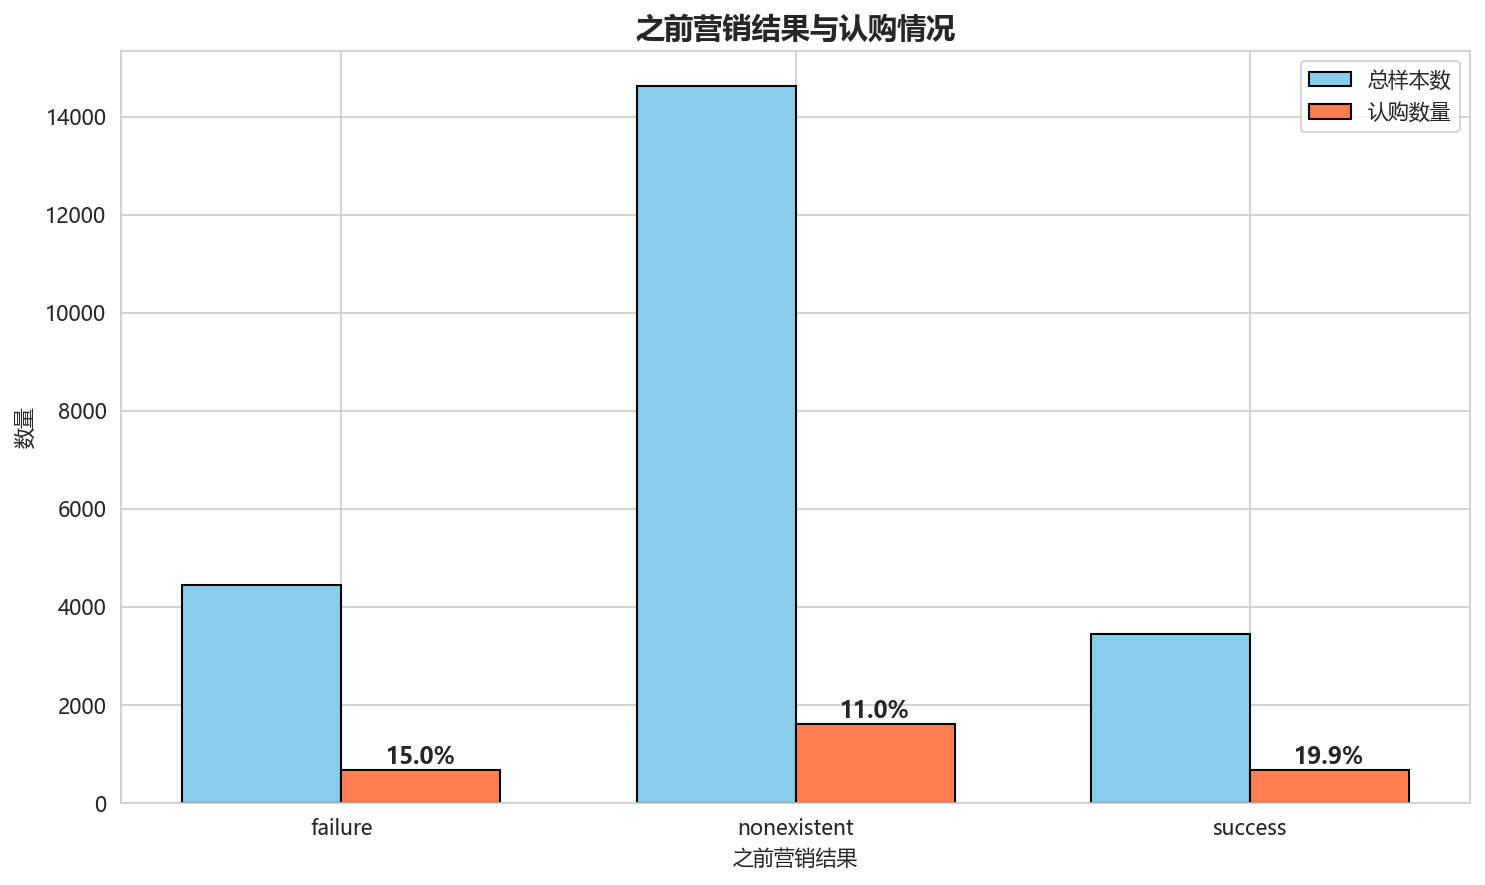


poutcome统计:
- failure: 总数=4442, 认购=665, 认购率=14.97%
- nonexistent: 总数=14618, 认购=1604, 认购率=10.97%
- success: 总数=3440, 认购=683, 认购率=19.85%


In [26]:
# 6.4 poutcome（之前营销结果）分析
fig, ax = plt.subplots(figsize=(10, 6))

poutcome_data = df.groupby('poutcome').agg({
    'subscribe': [lambda x: (x == 'yes').sum(), 'count']
}).reset_index()
poutcome_data.columns = ['poutcome', 'yes_count', 'total']
poutcome_data['subscribe_rate'] = poutcome_data['yes_count'] / poutcome_data['total'] * 100

x = np.arange(len(poutcome_data))
width = 0.35

bars1 = ax.bar(x - width/2, poutcome_data['total'], width, label='总样本数', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, poutcome_data['yes_count'], width, label='认购数量', color='coral', edgecolor='black')

ax.set_xlabel('之前营销结果')
ax.set_ylabel('数量')
ax.set_title('之前营销结果与认购情况', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(poutcome_data['poutcome'])
ax.legend()

# 在柱子上方添加认购率
for i, (_, row) in enumerate(poutcome_data.iterrows()):
    ax.annotate(f'{row["subscribe_rate"]:.1f}%', 
                xy=(i + width/2, row['yes_count']), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/poutcome_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\npoutcome统计:")
for _, row in poutcome_data.iterrows():
    print(f"- {row['poutcome']}: 总数={row['total']}, 认购={row['yes_count']}, 认购率={row['subscribe_rate']:.2f}%")

## 7. 数据探索总结与建议

### 7.1 数据概况
- **样本总量**: 22,500 条记录
- **特征数量**: 21 个特征（不含ID）
- **目标变量**: subscribe (yes/no)
- **缺失值**: 无缺失值
- **类别不平衡**: 正负样本比例约 1:6.62

### 7.2 关键发现

#### 数值型特征
| 特征 | 发现 |
|------|------|
| age | 年龄18-25岁和65+的客户认购率较高 |
| duration | 通话时长越长，认购率越高（重要特征，但需注意数据泄露风险）|
| campaign | 联系次数过多反而可能降低认购率 |
| pdays | 近期联系过的客户认购率较高 |
| emp_var_rate | 就业变动率低时认购率较高（与目标负相关） |

#### 类别型特征
| 特征 | 发现 |
|------|------|
| job | 学生、退休人员认购率最高 |
| marital | 单身客户认购率高于已婚客户 |
| contact | 手机联系效果优于座机 |
| month | 3月、9月、10月、12月认购率较高 |
| poutcome | 之前成功的客户再次认购率最高 |

### 7.3 建模建议

1. **处理类别不平衡**:
   - 使用 SMOTE、ADASYN 等过采样方法
   - 或使用欠采样方法
   - 或在模型中设置 class_weight='balanced'

2. **特征工程**:
   - 对 age 进行分段
   - 对 duration 进行分段（注意：实际应用中可能无法使用此特征）
   - 将 pdays 转换为是否联系过的二值特征
   - 对经济指标进行标准化

3. **注意多重共线性**:
   - 经济指标之间存在较强相关性
   - 可考虑使用 PCA 或特征选择

4. **特别注意 duration 特征**:
   - 该特征与认购率高度相关
   - 但在实际预测时，通话结束前无法获得此信息
   - 如用于实时预测，应考虑排除此特征

In [15]:
# 最终特征汇总表
print("=" * 80)
print("特征汇总统计表")
print("=" * 80)

# 数值型特征统计
print("\n【数值型特征】")
num_summary = df[numerical_features].describe().T
num_summary['missing'] = df[numerical_features].isnull().sum()
num_summary['dtype'] = df[numerical_features].dtypes
print(num_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing']])

# 类别型特征统计
print("\n\n【类别型特征】")
cat_summary = []
for col in categorical_features:
    cat_summary.append({
        'feature': col,
        'unique_values': df[col].nunique(),
        'most_common': df[col].mode()[0],
        'most_common_freq': df[col].value_counts().iloc[0],
        'missing': df[col].isnull().sum()
    })
cat_df = pd.DataFrame(cat_summary)
print(cat_df.to_string(index=False))

# 清理临时列
df.drop(['age_group', 'duration_group'], axis=1, inplace=True, errors='ignore')

特征汇总统计表

【数值型特征】
                    count         mean          std      min      25%  \
age               22500.0    40.407511    12.086078    16.00    32.00   
duration          22500.0  1146.303733  1432.432125     0.00   143.00   
campaign          22500.0     3.364800     7.223837     0.00     1.00   
pdays             22500.0   773.991956   326.934334     0.00   557.75   
previous          22500.0     1.316444     1.918733     0.00     0.00   
emp_var_rate      22500.0     0.078529     1.573831    -3.40    -1.80   
cons_price_index  22500.0    93.548785     2.805786    87.64    91.19   
cons_conf_index   22500.0   -39.877180     5.805442   -53.28   -44.16   
lending_rate3m    22500.0     3.302490     1.611777     0.60     1.43   
nr_employed       22500.0  5137.211285   170.670611  4715.42  5008.51   

                       50%        75%      max  missing  
age                 38.000    47.0000   101.00        0  
duration           353.000  1873.0000  5149.00        0  
campa